## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Admittance.csv')
dataset = data.copy()
dataset

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


### Replace all No entries with 0, and all Yes entries with 1

In [3]:
# dataset['Admitted'].map({'Yes': 1, 'No': 0}) # Test
dataset['Admitted'] = dataset['Admitted'].map({'Yes': 1, 'No': 0})

In [4]:
dataset

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Defining Variables

In [5]:
# Defind the dependent and independent variables

y = dataset['Admitted']
x1 = dataset['SAT']

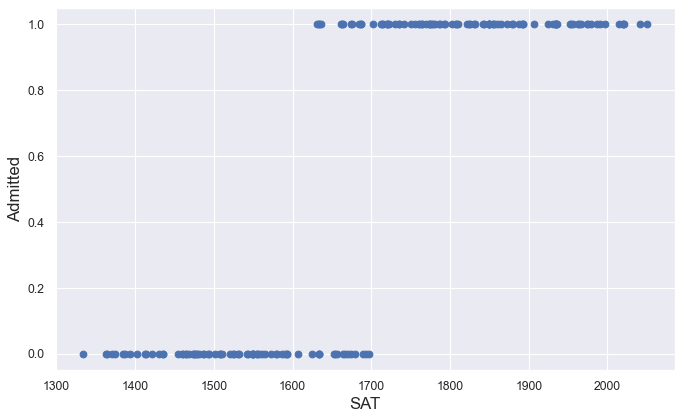

In [6]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize=15)
plt.ylabel('Admitted', fontsize=15)
plt.show()

### Ploting with a straight lineb



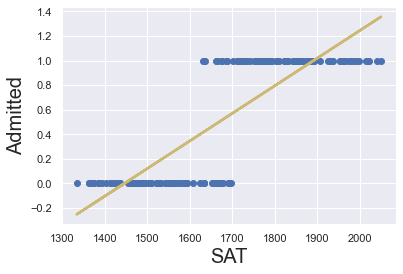

In [7]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as I will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Logistic Regression Curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


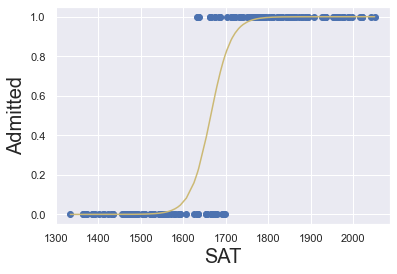

In [8]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

### Logistic Regression Using Statsmodel -  Régression logistique utilisant Statsmodel

In [12]:
# Add constant x
# Ajouter une constante  x

x = sm.add_constant(x1)

# Calculating the regression
# Calculer la régression

log_reg = sm.Logit(y,x)

# Fitting the regression
# Ajuster la régression

result_log_reg = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [13]:
# The function value shows the value of the objective function.
# The number of iterations indicates the number of trials statsmodel did to fit the regression.
# After 35 trial, the objective function can't be optimize in statsmodel

# La valeur de la fonction indique la valeur de la fonction objective.
# Le nombre d'itérations indique le nombre d'essais effectués par statsmodel pour ajuster la régression.
# Après 35 essais, la fonction objectif ne peut plus être optimisée par statsmodel.

### Regression Summary  - Résumé de la régression

In [14]:
result_log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.7992
Time:                        13:12:11   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

The **MLE**(_Maximum Likelyhood Estimation_):

    estimates how likely a model describes the real undelying relations of the variables
    The bigger the **MLE**, the higher the probability that a model is correct
    
The **Log-Likelihood:**

    This is almost always negative, the bigger(>= 0) the better the regression

The **LL-Null** (LogLikelihood - Null):

    This is the Log-Likelihood of a modelwith no independent variable i.e y = β<sub>0</sub> * 1
    1 here is just an array of ones
    
The **LLR p-value**(Log-Likelihood Ratio) - _this is the F-Statistics of a Logestic Regression_:

    This measure if a model is statistically different from LL-Null(i.e if a model is useful or not).
    Use the p-value associated with it to make decisions.
    
The **Pseudo R-squared**:

    This is used to measure's variations of the same model. The best values are between 0.2 and 0.4

Le **MLE** (_Maximum Likelyhood Estimation_) :

    estime la probabilité qu'un modèle décrive les relations réelles et sous-jacentes des variables.
    Plus le **MLE** est grand, plus la probabilité qu'un modèle soit correct est élevée.
    
La **Vraisemblance logarithmique**.

    Elle est presque toujours négative, plus elle est grande (>= 0), meilleure est la régression.

Le **LL-Null** (Log-Likelihood - Null) :

    C'est la Log-Vraisemblance d'un modèle sans variable indépendante, c'est-à-dire y = β<sub>0</sub> * 1.
    1 ici est juste un tableau de 1
    
Le **LLR p-value**(Log-Likelihood Ratio) - _c'est la F-Statistique d'une régression logique_ :

    Elle mesure si un modèle est statistiquement différent de LL-Null (c'est-à-dire si un modèle est utile ou non).
    Utilisez la valeur p qui lui est associée pour prendre des décisions.
    
Le **Pseudo R-carré** :

    Il est utilisé pour mesurer les variations d'un même modèle. Les meilleures valeurs se situent entre 0,2 et 0,4.

## Multiple Logistic Regression - Régression logistique multiple

In [16]:
# importing new dataset

new_data = pd.read_csv("Admittance2.csv")
new_dataset = new_data.copy()
new_dataset

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [19]:
# Mapping the Variables to conform to numeric
# Mapper les variables pour qu'elles soient conformes au numérique

# new_dataset["Admitted"].map({'Yes':1, 'No': 0}) #Test

# Male = 0, is the bench mark here
# Male = 0, est le point de référence ici

new_dataset["Admitted"] = new_dataset["Admitted"].map({'Yes':1, 'No': 0})
new_dataset["Gender"] = new_dataset["Gender"].map({'Female':1, 'Male': 0})
new_dataset

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


## Declare the dependent and the independent variables

#### Logistic Regression only with Gender as independent variable
#### Régression logistique uniquement avec "Gender" comme variable indépendante


In [20]:
y = new_dataset["Admitted"]
x1 = new_dataset["Gender"]

# Regression

In [21]:
# Adding constant
x = sm.add_constant(x1)
log_reg = sm.Logit(y,x)
log_reg_result = log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


In [23]:
log_reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.1659
Time:                        14:42:23   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

From the summary, the model is statistically significant(LLR p-value < 0.05) and 
the "Gender" variable is also important in the regression(P-value < 0.05)

D'après le résumé, le modèle est statistiquement significatif (valeur-p LLR < 0,05) et 
la variable "Sexe" est également importante dans la régression (valeur-p  < 0,05).

In [24]:
# Coef const and Gender is -0.6436 & 2.0786 respectively

# log(odds) = -0.6436 + 2.0786 * "Gender"

##### Multiple Regressions

In [25]:
y = new_dataset["Admitted"]
x1 = new_dataset[["Gender","SAT"]]

In [26]:
x = sm.add_constant(x1)
log_reg = sm.Logit(y, x)
log_reg_result = log_reg.fit()
log_reg_result.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.8249
Time:                        14:53:33   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

From this new observation, it can seen that the new model is much more statistically significant
than the first one as the values of the MLE, Log-Likelihood and LLR p-value have all increased
significantly.
Another observation is the difference in value of the p-value of the "Gender" variable which has increase in respect to SAT
but it is still statistically significant to the Regression model

A partir de cette nouvelle observation, on peut voir que le nouveau modèle est beaucoup plus significatif statistiquement
que le premier, car les valeurs de la MLE, de la Log-Vraisemblance et de la p-value LLR ont toutes augmenté de façon
significativement.
Une autre observation est la différence de valeur de la p-value de la variable "Sexe" qui a augmenté par rapport à SAT
mais elle est toujours statistiquement significative pour le modèle de régression.

In [27]:
np.exp(1.9449)

6.992932526814459

In [28]:
# Since Male is our benchmark variable, the above imply's that a Female with the same SAT score 
# as a Male is 7 times more likely to be admitted than a male

# Puisque Male est notre variable de référence, ce qui précède implique qu'une femme avec le même score SAT 
# qu'un homme a 7 fois plus de chances d'être admise qu'un homme.

## Model Accuracy  -  Précision du modèle

In [34]:
# See the predictions made by the model
# Voir les prédictions faites par le modèle

# np.set_printoptions(formatter=None)
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

log_reg_result.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [36]:
# An array containing the TRUE (actual) values
np.array(new_dataset['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [38]:
# A prediction table (confusion matrix) showing the 
log_reg_result.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [44]:
# Some neat formatting to read the table (better when seeing it for the first time)
cm_df = pd.DataFrame(log_reg_result.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df

,Predicted 0,Predicted 1
0,69.0,5.0
1,4.0,90.0


In [45]:
# Some neat formatting to read the table (better when seeing it for the first time)
cm_df = pd.DataFrame(log_reg_result.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


#### The simple interpretation of the Cunfusion Matrix Table is that


For 69 predictions, the Model predicted 0 and the actual(True) value was 0

For 90 predictions, the model predicted 1 and the actual(True) value was 1

    *It can be concluded that the model is a very good model*
    
#### Also,
    In 5 predictions, the Model predicted 1 and the actual(True) value was 0
    In 4 predictions, the model predicted 0 and the actual(True) value was 1

    
#### L'interprétation simple du tableau de la matrice de confusion est que


Pour 69 prédictions, le modèle a prédit 0 et la valeur réelle(True) était 0

Pour 90 prédictions, le modèle a prédit 1 et la valeur réelle (vraie) était 1.

    **On peut en conclure que le modèle est un très bon modèle.    
    
#### Et,
    Dans 5 prédictions, le modèle a prédit 1 et la valeur réelle (vraie) était 0
    Dans 4 prédictions, le modèle a prédit 0 et la valeur réelle(True) était 1    

In [47]:
# Create an array (so it is easier to calculate the accuracy)
# Créer un tableau (pour faciliter le calcul de la précision)

cm = np.array(cm_df)

# Calculate the accuracy of the model
# Calculer la précision du modèle

accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

# Testing new Data with previous model

In [48]:
# Importing new data to test

new_data3 = pd.read_csv("Admittance3.csv")
new_dataset3 = new_data3.copy()
new_dataset3

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [49]:
# Tranforming Categorical data into numeric

new_dataset3["Gender"] = new_dataset3["Gender"].map({"Female": 1, "Male": 0})
new_dataset3["Admitted"] = new_dataset3["Admitted"].map({"Yes": 1, "No": 0})
new_dataset3

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [52]:
# Declaring Dependent and Independent variables

y_test = new_dataset3["Admitted"]
x_test = new_dataset3.drop(["Admitted"], axis=1)

In [54]:
x_test.head()

,SAT,Gender
0,1323,0
1,1725,1
2,1762,1
3,1777,0
4,1665,0


In [55]:
# Verify if new_dataset3 is ordered the same way as the independent variable of the previous regression
# Vérifier si new_dataset3 est ordonné de la même manière que les variables indépendantes de la régression précédente.

x.head()

,const,Gender,SAT
0,1.0,0,1363
1,1.0,1,1792
2,1.0,1,1954
3,1.0,0,1653
4,1.0,0,1593


In [57]:
# Adding constants to the text data
# Ajout de constantes aux données du texte

x_test = sm.add_constant(x_test)
x_test.head()

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0


In [59]:
# Rearranging the columns
# Réorganiser les colonnes

# x_test = x_test[x_test.columns.values]

x_test = x_test[["const", "Gender", "SAT"]]
x_test.head()

,const,Gender,SAT
0,1.0,0,1323
1,1.0,1,1725
2,1.0,1,1762
3,1.0,0,1777
4,1.0,0,1665


In [60]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [61]:
# Create a confusion matrix with the test data
# Créer une matrice de confusion avec les données de test

cm = confusion_matrix(x_test,y_test,log_reg_result)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

There's an Accuracy of  0.8947368421052632, which is less than that of the training data but still 
Very statistically significant.

This dicrease in accuracy is due to a possible overfit of the training model

La précision est de 0,8947368421052632, ce qui est inférieur à celle des données d'entraînement mais tout de même très significative sur le plan statistique.

Cette diminution de la précision est due à un éventuel surajustement du modèle d'entraînement.

In [62]:
# Format for easier understanding (not needed later on)
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [63]:
# Check the missclassification rate
# Note that Accuracy + Missclassification rate = 1 = 100%
print ('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
